In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [16]:
from sklearn.model_selection import train_test_split
vector = np.vectorize(np.float64)
df = pd.read_csv('FTIR_data.csv')
classData=df.loc[1931:].values.tolist()
classData=classData[1:]
encodeClassdata = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ]
encodeClassdata = np.array(encodeClassdata)

labelHeader = df['Raman'].to_list()
vector = np.vectorize(np.float64)
labels = df['Raman']
lab = labels[0:1931]

lables = vector(lab)
PCA_dat = df[0:1931]

PCA_dat = PCA_dat.iloc[:, 1:]
print(PCA_dat.shape)
Input = np.asarray(PCA_dat)
Input.shape, encodeClassdata.shape
Input_T = Input.T

X1_train, X1_test, y_train, y_test = train_test_split(Input_T, encodeClassdata,test_size=0.2, random_state=42)
Input_T.shape

(1931, 60)


(60, 1931)

In [17]:
vector = np.vectorize(np.float64)
df = pd.read_csv('Raman_Ndata.csv')
classData = df.loc[264, :].values.tolist()
classData = classData[1:]
encodeClassdata = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0,1,1,1, 1, 1, 1, 1,1,1,1,1,1, 1,1,1,1,1,1,1,1,1,1, 1,1,1,1,1,1,1,1]
encodeClassdata = np.array(encodeClassdata)

labelHeader = df['Raman'].to_list()
vector = np.vectorize(np.float64)
labels = df['Raman']
lab = labels[0:264]
#lab
lables = vector(lab)
PCA_dat = df[0:264]
#PCA_dat.head
PCA_dat = PCA_dat.iloc[:, 1:]
Input = np.asarray(PCA_dat)
#Input.shape, encodeClassdata.shape
Input_T2 = np.transpose(Input)
#Input_T.shape
#classData
X2_train, X2_test, y2_train, y2_test = train_test_split(Input_T2, encodeClassdata,test_size=0.2, random_state=42)

count_row = X2_train.shape[0]
X2_train.shape
y2_test.shape


(12,)

In [18]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def feature_selection(X_train_source1, X_train_source2, y_train):
    # Select the top 5 features from each source using SelectKBest.
    selector_source1 = SelectKBest(score_func=f_classif, k='all')
    selector_source2 = SelectKBest(score_func=f_classif, k='all')
    
    X_train_source1 = selector_source1.fit_transform(X_train_source1, y_train)
    X_train_source2 = selector_source2.fit_transform(X_train_source2, y_train)

    # Fuse the selected features from each source.
    X_train_fused = np.concatenate([X_train_source1, X_train_source2], axis=1)

    return X_train_fused

In [19]:
Input_T=feature_selection(Input_T,Input_T2,encodeClassdata)

X_train=feature_selection(X1_train,X2_train,y2_train)
X_train.shape
X_test=feature_selection(X1_test,X2_test,y2_test)
Input_T.shape

(60, 2195)

In [20]:
from sklearn.preprocessing import StandardScaler
# Load the data and perform preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
Input_T=scaler.fit_transform(Input_T)
X_train_1, X_test_1, y2_train, y2_test = train_test_split(Input_T, encodeClassdata,test_size=0.2, random_state=42)

In [21]:
import numpy as np
import pywt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Apply wavelet transform denoising and reconstruct the denoised data
def wavelet_denoising(X, wavelet='db3', threshold=0.07):
    coefficients = pywt.wavedec(X, wavelet)
    thresholded_coefficients = []
    for level, coefficient in enumerate(coefficients):
        if level == 0:
            thresholded_coefficients.append(coefficient)
        else:
            thresholded_coefficients.append(np.where(np.abs(coefficient) > threshold, coefficient, 0))
    
    denoised_X = pywt.waverec(thresholded_coefficients, wavelet)
    return denoised_X

# Load the data


# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(Input_T, encodeClassdata, test_size=0.2, random_state=42)

# Apply wavelet denoising on the training set
#denoised_X_train = wavelet_denoising(X_train, wavelet='db3', threshold=0.07)

# Apply the same wavelet denoising on the testing set
#denoised_X_test = wavelet_denoising(X_test, wavelet='db3', threshold=0.07)
denoised_Input_T = wavelet_denoising(Input_T, wavelet='db3', threshold=0.05)
denoised_X_train_1 = wavelet_denoising(X_train, wavelet='db3', threshold=0.05)

# Apply the same wavelet denoising on the testing set
denoised_X_test_1 = wavelet_denoising(X_test, wavelet='db3', threshold=0.05)

# Perform additional preprocessing steps
scaler = StandardScaler()
#X_train = scaler.fit_transform(denoised_X_train)
#X_test = scaler.transform(denoised_X_test)
denoised_Input_T=scaler.fit_transform(denoised_Input_T)
# Fit a logistic regression model



In [22]:
import numpy as np
import pywt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy.signal import savgol_filter

# Generate example dataset
# Assuming X and y are your feature matrix and target variable respectively


# Apply wavelet transformation as a preprocessing step
def wavelet_savgol_transform(X, wavelet_type, window_length, polyorder):
    transformed_data = []
    for i in range(len(X)):
        # Wavelet transform
        coefficients = pywt.dwt(X[i], wavelet_type)
        transformed_signal = np.concatenate(coefficients)

        # Savitzky-Golay filtering
        smoothed_signal = savgol_filter(transformed_signal, window_length, polyorder)

        transformed_data.append(smoothed_signal)
    return np.array(transformed_data)




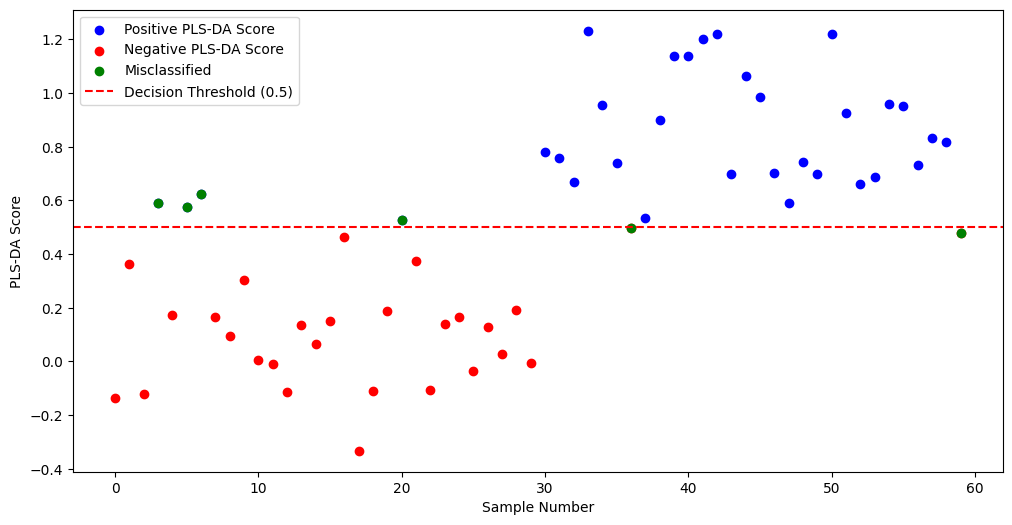

Misclassified samples: [ 3  5  6 20 36 59]


In [23]:
import numpy as np
import pywt
from sklearn.cross_decomposition import PLSRegression
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# Assuming you have denoised_Input_T, encodeClassdata, and the wavelet_savgol_transform function defined

# Load or prepare the dataset and variables
Input_T = wavelet_savgol_transform(denoised_Input_T, 'db3', 5, 2)

# Load the trained PLS-DA model
plsda = PLSRegression(n_components=2)

# Initialize an empty list to store scores
scores = []
sample_numbers = range(len(Input_T))

# Iterate over each sample number
for sample_number in range(len(Input_T)):
    # Extract the variables for the current sample number
    sample_variables = Input_T[sample_number]
    sample_variables = np.reshape(sample_variables, (1, -1))

    # Fit the PLS-DA model on the training data
    plsda.fit(Input_T, encodeClassdata)
    X_train_transformed = plsda.transform(Input_T)
    
    # Make predictions using the PLS-DA model (using the first component as score)
    score = plsda.predict(sample_variables)[0, 0]
    
    # Store the score
    scores.append(score)

# Convert the scores list to a numpy array for further processing
scores = np.asarray(scores)
scores = np.squeeze(scores)

# Get the ground truth labels for comparison
true_labels = encodeClassdata  # Assuming encodeClassdata contains the true class labels (0 or 1)

# Identify misclassified samples
misclassified_samples = np.where((scores > 0.5) != true_labels)[0]

# Plot the scores and differentiate the scatter points
# ... (previous code)

# Separate positive and negative scores for PLS-DA Score
positive_scores = scores[scores >= 0.5]
negative_scores = scores[scores < 0.5]

# Plot the scores and differentiate the scatter points
plt.figure(figsize=(12, 6))
plt.scatter(np.array(sample_numbers)[scores >= 0.5], positive_scores, c='blue', label='Positive PLS-DA Score')
plt.scatter(np.array(sample_numbers)[scores < 0.5], negative_scores, c='red', label='Negative PLS-DA Score')
plt.scatter(np.array(sample_numbers)[misclassified_samples], scores[misclassified_samples], marker='o', color='green', label='Misclassified')

# Mark misclassified samples with red circles
#plt.scatter(np.array(sample_numbers)[misclassified_samples], scores[misclassified_samples], marker='o', color='red')

# Draw decision value (threshold)
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Threshold (0.5)')

plt.xlabel("Sample Number")
plt.ylabel("PLS-DA Score")
plt.legend()
plt.show()


print("Misclassified samples:", misclassified_samples)

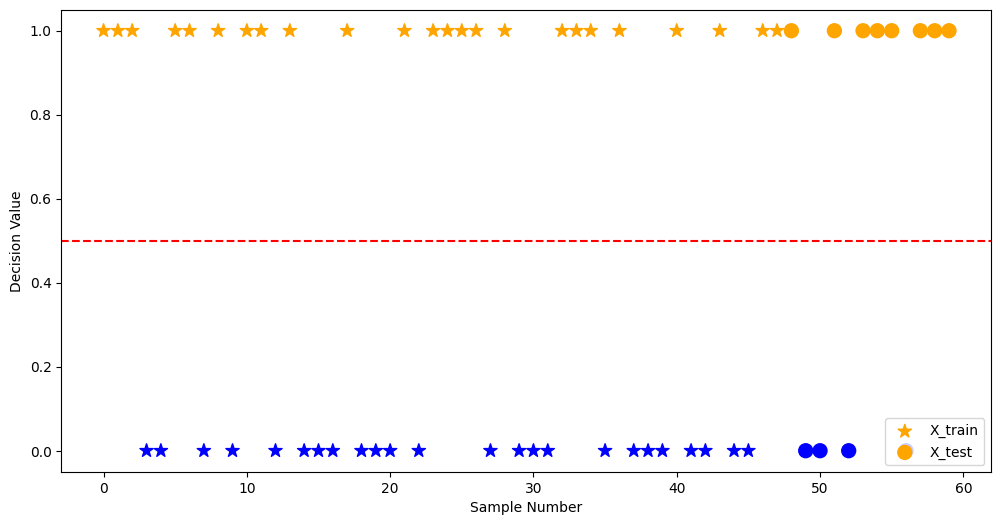

In [24]:
import numpy as np
from sklearn import svm
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load or prepare the dataset and variables
Input_T = wavelet_savgol_transform(denoised_Input_T, 'db3', 5, 2)
X_train_1 = wavelet_savgol_transform(denoised_X_train_1, 'db3', 5, 2)
X_test_1 = wavelet_savgol_transform(denoised_X_test_1, 'db3', 5, 2)

# Load the trained model
model = PLSRegression(n_components=2)

# Initialize an empty list to store decision values
decision_values = []

# Iterate over each sample number in X_train
for sample_number in range(len(X_train_1)):
    # Extract the variables for the current sample number
    sample_variables = X_train_1[sample_number]
    sample_variables = np.reshape(sample_variables, (1, -1))
    
    # Fit the PLS regression model on the training data
    model.fit(X_train_1, y_train)
    
    # Transform the training data using PLS regression
    X_train_transformed = model.transform(X_train_1)
    
    # Initialize and train the LDA classifier
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train_transformed, y_train)
    
    # Make predictions using the LDA classifier
    y_pred_train = lda.predict(X_train_transformed[sample_number].reshape(1, -1))
    
    # Store the decision value
    decision_values.append(y_pred_train)

# Iterate over each sample number in X_test
for sample_number in range(len(X_test_1)):
    # Extract the variables for the current sample number
    sample_variables = X_test_1[sample_number]
    sample_variables = np.reshape(sample_variables, (1, -1))
    
    # Fit the PLS regression model on the training data
    model.fit(X_train_1, y_train)
    
    # Transform the test data using PLS regression
    X_test_transformed = model.transform(X_test_1)
    
    # Make predictions using the LDA classifier
    y_pred_test = lda.predict(X_test_transformed[sample_number].reshape(1, -1))
    
    # Store the decision value
    decision_values.append(y_pred_test)

# Convert the decision_values list to a numpy array for further processing
decision_values = np.asarray(decision_values)
decision_values = np.squeeze(decision_values)

# Create sample_numbers for both X_train and X_test
sample_numbers_train = range(len(X_train_1))
sample_numbers_test = range(len(X_train_1), len(X_train_1) + len(X_test_1))

# Set the threshold value
threshold = 0.5

# Plot the decision values for both X_train and X_test
plt.figure(figsize=(12, 6))
plt.scatter(sample_numbers_train, decision_values[:len(X_train_1)], c=np.where(decision_values[:len(X_train_1)] < threshold, 'blue', 'orange'), marker='*', s=100, label='X_train')
plt.scatter(sample_numbers_test, decision_values[len(X_train_1):], c=np.where(decision_values[len(X_train_1):] < threshold, 'blue', 'orange'), marker='o', s=100, label='X_test')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.xlabel("Sample Number")
plt.ylabel("Decision Value")
plt.legend()
plt.show()


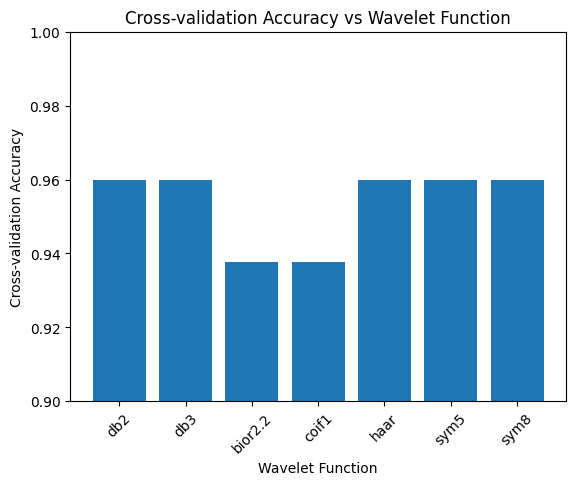

In [25]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_decomposition import PLSRegression

from scipy.signal import savgol_filter

'''
# Function to perform Wavelet Transform and Savitzky-Golay filtering
def wavelet_savgol_transform(X, wavelet_type, window_length, polyorder):
    transformed_data = []
    for i in range(len(X)):
        # Wavelet transform
        coefficients = pywt.dwt(X[i], wavelet_type)
        transformed_signal = np.concatenate(coefficients)

        # Check if the window length is larger than the size of the transformed signal
        if window_length > transformed_signal.size:
            window_length = transformed_signal.size

        # Check if the polyorder is less than the window length
        if polyorder >= window_length:
            polyorder = window_length - 1

        # Savitzky-Golay filtering
        smoothed_signal = savgol_filter(transformed_signal, window_length, polyorder)

        transformed_data.append(smoothed_signal)
    return np.array(transformed_data)
'''

# Generate example dataset
# Assuming X and y are your feature matrix and target variable respectively
# Replace X and y with your actual data

# Apply wavelet transformation as a preprocessing step
wavelet_functions = [ 'db2', 'db3', 'bior2.2', 'coif1', 'haar', 'sym5', 'sym8']
window_length = 5  # Adjust the window length as needed
polyorder = 2  # Adjust the polynomial order as needed

accuracy = []

for wavelet in wavelet_functions:
        denoised_X_train = wavelet_denoising(X_train, wavelet=wavelet, threshold=0.05)
        denoised_X_test = wavelet_denoising(X_test, wavelet=wavelet, threshold=0.05)
    
        denoised_X_train = wavelet_savgol_transform(denoised_X_train, wavelet, 5, 2)
        denoised_X_test = wavelet_savgol_transform(denoised_X_test, wavelet, 5, 2)
        #scaler = StandardScaler()
        #denoised_X_train = scaler.fit_transform(denoised_X_train)
        #denoised_X_test = scaler.fit_transform(denoised_X_test)
       
        # Fit a PLS-DA + LDA classifier
        plsda = PLSRegression(n_components=2)

        # Fit the PLS-DA model on the training data
        plsda.fit(denoised_X_train, y_train)

        # Transform the training and test data using PLS-DA
        X_train_transformed = plsda.transform(denoised_X_train)
        X_test_transformed = plsda.transform(denoised_X_test)

        # Initialize the classifier for LDA
        lda = LinearDiscriminantAnalysis()

        # Train the classifier on the transformed training data
        lda.fit(X_train_transformed, y_train)

        # Make predictions using the PLS-DA + LDA classifier
        y_pred_lda = lda.predict(X_test_transformed)
        

        # Perform cross-validation for PLS-DA + LDA
        cv_scores_lda = cross_val_score(lda, X_train_transformed, y_train, cv=5)
        mean_cv_score_lda = np.mean(cv_scores_lda)
        accuracy.append(mean_cv_score_lda)

# Plot Accuracy vs Wavelet Function
plt.bar(wavelet_functions, accuracy)
plt.xlabel("Wavelet Function")
plt.ylabel("Cross-validation Accuracy")
plt.title("Cross-validation Accuracy vs Wavelet Function")
plt.ylim([0.9, 1])
plt.xticks(rotation=45)
plt.show()


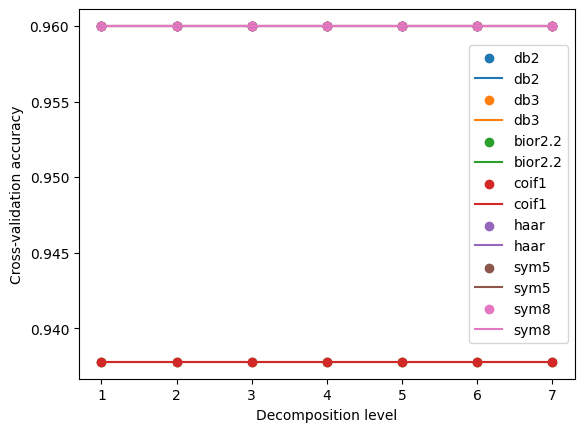

In [26]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_decomposition import PLSRegression

# Define a function to apply wavelet denoising and reconstruct the denoised data
def wavelet_denoising(X, wavelet='db3', threshold=0.07, level=1):
    coefficients = pywt.wavedec(X, wavelet, level=level)
    thresholded_coefficients = []
    for level, coefficient in enumerate(coefficients):
        if level == 0:
            thresholded_coefficients.append(coefficient)
        else:
            thresholded_coefficients.append(np.where(np.abs(coefficient) > threshold, coefficient, 0))
    denoised_X = pywt.waverec(thresholded_coefficients, wavelet)
    return denoised_X

# Define a function to perform wavelet denoising and Savitzky-Golay filtering

# Load the data or generate X_train, X_test, and y_train

wavelet_functions = [ 'db2', 'db3', 'bior2.2', 'coif1', 'haar', 'sym5', 'sym8']

# Apply wavelet denoising at different decomposition levels for each wavelet function
accuracy_dict = {}
for wavelet in wavelet_functions:
    accuracy = []
    for level in range(1, 8):
        denoised_X_train = wavelet_denoising(X_train, wavelet=wavelet, threshold=0.05, level=level)
        denoised_X_test = wavelet_denoising(X_test, wavelet=wavelet, threshold=0.05, level=level)
    
        denoised_X_train = wavelet_savgol_transform(denoised_X_train, wavelet, 5, 2)
        denoised_X_test = wavelet_savgol_transform(denoised_X_test, wavelet, 5, 2)
        
        # Fit a PLS-DA + LDA classifier
        plsda = PLSRegression(n_components=2)

        # Fit the PLS-DA model on the training data
        plsda.fit(denoised_X_train, y_train)

        # Transform the training and test data using PLS-DA
        X_train_transformed = plsda.transform(denoised_X_train)
        X_test_transformed = plsda.transform(denoised_X_test)

        # Initialize the classifier for LDA
        lda = LinearDiscriminantAnalysis()

        # Train the classifier on the transformed training data
        lda.fit(X_train_transformed, y_train)

        # Make predictions using the PLS-DA + LDA classifier
        y_pred_lda = lda.predict(X_test_transformed)

        # Perform cross-validation for PLS-DA + LDA
        cv_scores_lda = cross_val_score(lda, X_train_transformed, y_train, cv=5)
        mean_cv_score_lda = np.mean(cv_scores_lda)
        accuracy.append(mean_cv_score_lda)

    accuracy_dict[wavelet] = accuracy

# Plot the accuracy vs decomposition level for each wavelet function
for wavelet, accuracy in accuracy_dict.items():
    plt.scatter(range(1, 8), accuracy, label=wavelet)
    plt.plot(range(1, 8), accuracy, label=wavelet)
    



plt.xlabel('Decomposition level')
plt.ylabel('Cross-validation accuracy')
plt.legend()
plt.show()


In [27]:
X_train= wavelet_savgol_transform(X_train,'db3',5,2)
X_test= wavelet_savgol_transform(X_test,'db3',5,2)

In [28]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# Initialize the PLS-DA model
plsda = PLSRegression(n_components=2)

# Fit the PLS-DA model on the training data
plsda.fit(X_train, y_train)

# Transform the training and test data using PLS-DA
X_train = plsda.transform(X_train)
X_test = plsda.transform(X_test)

# Initialize the classifier for PLS-DA
lda = LinearDiscriminantAnalysis()

# Train the classifier on the transformed training data
lda.fit(X_train, y_train)

# Make predictions using the PLS-DA + LDA classifier
y_pred_plsda = lda.predict(X_test)

# Evaluate the performance of PLS-DA + LDA
classification_rep_plsda = classification_report(y_test, y_pred_plsda)
confusion_mat_plsda = confusion_matrix(y_test, y_pred_plsda)
accuracy_plsda = np.mean(y_pred_plsda == y_test)

# Perform cross-validation for PLS-DA + LDA
cv_scores_plsda = cross_val_score(lda, X_train, y_train, cv=5)
mean_cv_score_plsda = np.mean(cv_scores_plsda)

print("PLS-DA + LDA Classifier Performance:")
print(classification_rep_plsda)
print("Confusion Matrix (PLS-DA + LDA):")
print(confusion_mat_plsda)
print("Accuracy (PLS-DA + LDA): {:.2f}".format(accuracy_plsda))
print("Cross-validation accuracy (PLS-DA + LDA): {:.2f}".format(mean_cv_score_plsda))

PLS-DA + LDA Classifier Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.88      0.93         8

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12

Confusion Matrix (PLS-DA + LDA):
[[4 0]
 [1 7]]
Accuracy (PLS-DA + LDA): 0.92
Cross-validation accuracy (PLS-DA + LDA): 0.96


best paramters aSVM {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


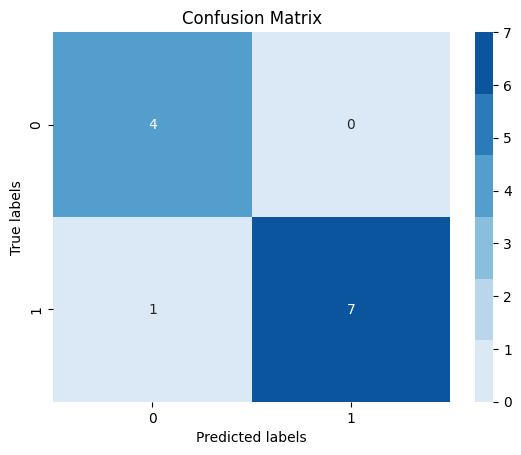

SVM Classifier Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.88      0.93         8

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12

Confusion Matrix (SVM):
[[4 0]
 [1 7]]
Cross-validation accuracy (SVM): 0.96


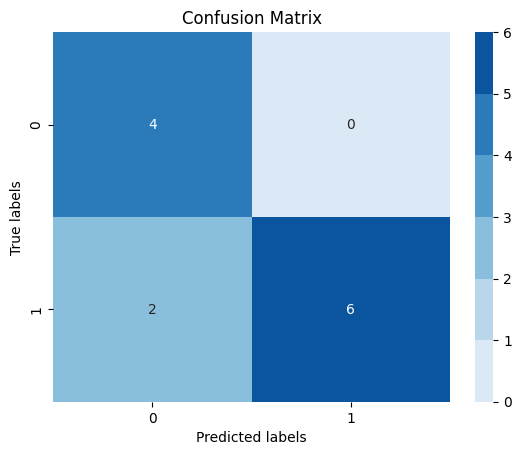

AdaBoost Classifier Performance:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.75      0.86         8

    accuracy                           0.83        12
   macro avg       0.83      0.88      0.83        12
weighted avg       0.89      0.83      0.84        12

Confusion Matrix (AdaBoost):
[[4 0]
 [2 6]]
Cross-validation accuracy (AdaBoost): 0.96


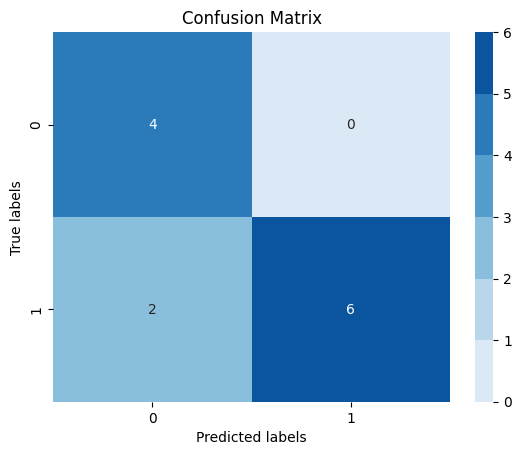

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.75      0.86         8

    accuracy                           0.83        12
   macro avg       0.83      0.88      0.83        12
weighted avg       0.89      0.83      0.84        12

Confusion Matrix (Decision Tree):
[[4 0]
 [2 6]]
Cross-validation accuracy (Decision Tree): 0.96


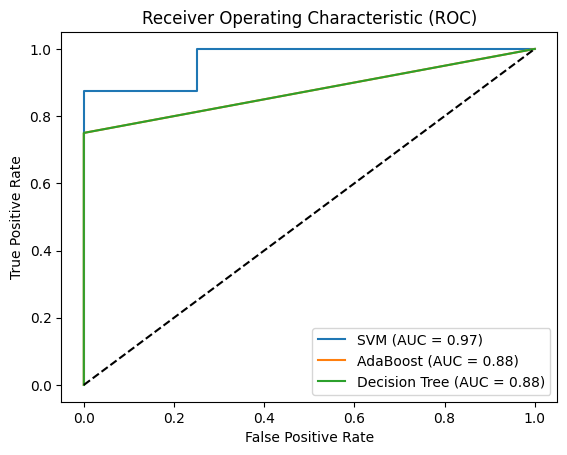

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameters to tune for each model

# Define the parameter grid for each classifier
param_grid = [
    # Parameters for SVM
    {
        'C': [0.1, 1, 10],
        'kernel': ['linear','poly', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    # Parameters for AdaBoost
    {
        'base_estimator': [DecisionTreeClassifier(), RandomForestClassifier()],
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001],
    },
    # Parameters for KNN
    # Parameters for Decision Tree
    {
        'max_depth': [3, 5, 7],
        'criterion': ['gini', 'entropy']
    }
]

# Initialize the models
svm_clf = svm.SVC()
adaboost = AdaBoostClassifier()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()

# Perform hyperparameter tuning for SVM
grid_search_svm = GridSearchCV(svm_clf, param_grid[0], cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters and best score for SVM
best_params_svm = grid_search_svm.best_params_
print("best paramters aSVM",best_params_svm)
best_score_svm = grid_search_svm.best_score_

# Initialize the best SVM classifier with the best hyperparameters
best_svm = svm.SVC(**best_params_svm)

# Perform cross-validation for SVM
svm_scores = cross_val_score(best_svm, X_train, y_train, cv=5)
mean_svm_score = np.mean(svm_scores)

# Train the best SVM classifier
best_svm.fit(X_train, y_train)

# Perform hyperparameter tuning for AdaBoost
grid_search_adaboost = GridSearchCV(adaboost, param_grid[1], cv=5, scoring='accuracy')
grid_search_adaboost.fit(X_train, y_train)

# Get the best hyperparameters and best score for AdaBoost
best_params_adaboost = grid_search_adaboost.best_params_
#print("best paramters adaboost",best_params_adaboost)
best_score_adaboost = grid_search_adaboost.best_score_

# Initialize the best AdaBoost classifier with the best hyperparameters
best_adaboost = AdaBoostClassifier(**best_params_adaboost)

# Perform cross-validation for AdaBoost
adaboost_scores = cross_val_score(best_adaboost, X_train, y_train, cv=5)
mean_adaboost_score = np.mean(adaboost_scores)

# Train the best AdaBoost classifier
best_adaboost.fit(X_train, y_train)
'''

# Perform hyperparameter tuning for KNN
grid_search_knn = GridSearchCV(knn, param_grid[2], cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters and best score for KNN
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

# Initialize the best KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params_knn)

# Perform cross-validation for KNN
knn_scores = cross_val_score(best_knn, X_train, y_train, cv=5)
mean_knn_score = np.mean(knn_scores)

# Train the best KNN classifier
best_knn.fit(X_train, y_train)
'''

# Perform hyperparameter tuning for Decision Tree
grid_search_dt = GridSearchCV(decision_tree, param_grid[2], cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and best score for Decision Tree
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Initialize the best Decision Tree classifier with the best hyperparameters
best_dt = DecisionTreeClassifier(**best_params_dt)

# Perform cross-validation for Decision Tree
dt_scores = cross_val_score(best_dt, X_train, y_train, cv=5)
mean_dt_score = np.mean(dt_scores)

# Train the best Decision Tree classifier
best_dt.fit(X_train, y_train)

# Make predictions using the best SVM classifier
y_pred_svm = best_svm.predict(X_test)
classification_rep_svm = classification_report(y_test, y_pred_svm)
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)
cmap = sns.color_palette("Blues")  # You can choose any color map you prefer

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat_svm, annot=True, cmap=cmap, fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print("SVM Classifier Performance:")
print(classification_rep_svm)
print("Confusion Matrix (SVM):")
print(confusion_mat_svm)
print("Cross-validation accuracy (SVM): {:.2f}".format(mean_svm_score))

# Make predictions using the best AdaBoost classifier
y_pred_adaboost = best_adaboost.predict(X_test)
classification_rep_adaboost = classification_report(y_test, y_pred_adaboost)
confusion_mat_adaboost = confusion_matrix(y_test, y_pred_adaboost)
cmap = sns.color_palette("Blues")  # You can choose any color map you prefer

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat_adaboost, annot=True, cmap=cmap, fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print("AdaBoost Classifier Performance:")
print(classification_rep_adaboost)
print("Confusion Matrix (AdaBoost):")
print(confusion_mat_adaboost)
print("Cross-validation accuracy (AdaBoost): {:.2f}".format(mean_adaboost_score))

'''
# Make predictions using the best KNN classifier
y_pred_knn = best_knn.predict(X_test)
classification_rep_knn = classification_report(y_test, y_pred_knn)
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)
cmap = sns.color_palette("Blues")  # You can choose any color map you prefer

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat_knn, annot=True, cmap=cmap, fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print("KNN Classifier Performance:")
print(classification_rep_knn)
print("Confusion Matrix (KNN):")
print(confusion_mat_knn)
print("Cross-validation accuracy (KNN): {:.2f}".format(mean_knn_score))
'''

# Make predictions using the best Decision Tree classifier
y_pred_dt = best_dt.predict(X_test)
classification_rep_dt = classification_report(y_test, y_pred_dt)
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)
cmap = sns.color_palette("Blues")  # You can choose any color map you prefer

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat_dt, annot=True, cmap=cmap, fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print("Decision Tree Classifier Performance:")
print(classification_rep_dt)
print("Confusion Matrix (Decision Tree):")
print(confusion_mat_dt)
print("Cross-validation accuracy (Decision Tree): {:.2f}".format(mean_dt_score))

# Calculate the ROC curve and AUC for each classifier
svm_probs = best_svm.decision_function(X_test)
adaboost_probs = best_adaboost.predict_proba(X_test)[:, 1]
#knn_probs = best_knn.predict_proba(X_test)[:, 1]
dt_probs = best_dt.predict_proba(X_test)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, adaboost_probs)
#fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)

roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)
#roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curves
plt.figure()
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost (AUC = {:.2f})'.format(roc_auc_adaboost))
#plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()




### 